For the provided dataset:
• diabetes.csv
Complete the following Problems.

Problem - 1: Perform a classification task with knn from scratch.
1. Load the Dataset:
• Read the dataset into a pandas DataFrame.

  • Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
  (e.g., check data types, missing values, summary statistics).

2. Handle Missing Data:
• Handle any missing values appropriately, either by dropping or imputing them based on the data.

3. Feature Engineering:
• Separate the feature matrix (X) and target variable (y).
• Perform a train - test split from scratch using a 70% − 30% ratio.

4. Implement KNN:
• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
• Compute distances using Euclidean distance.
• Write functions for:
– Predicting the class for a single query.
– Predicting classes for all test samples.
• Evaluate the performance using accuracy.

In [38]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/ConceptofAIandTechnology/diabetes.csv")
print("First few rows: \n")
print(df.head())

missing_values = df.isnull().sum()
print("\nMising values:\n")
print(missing_values)

data_types = df.dtypes
print("\nData type is :\n")
print(data_types)

summary_statics = df.describe()
print("\nSummary statics:\n")
print(summary_statics)

First few rows: 

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Mising values:

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     

In [39]:
#Handle Missing Data: • Handle any missing values appropriately, either by dropping or imputing them based on the data.
print("Missing Values Before Handling:")
missing_values = df.isnull().sum()
print(missing_values)

df_cleaned = df.dropna()
df_filled = df.fillna(df.mean())

print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values Before Handling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Missing Values After Handling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [40]:
#Feature Engineering: • Separate the feature matrix (X) and target variable (y). •
#Perform a train - test split from scratch using a 70% − 30% ratio.

X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Convert to numpy arrays for processing
X = X.values
y = y.values

# Perform a train-test split (70% train, 30% test)
def train_test_split(X, y, test_size=0.3, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    # Shuffle the data
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    # Calculate split index
    split_idx = int(X.shape[0] * (1 - test_size))

    # Split data into train and test sets
    X_train, X_test = X[indices[:split_idx]], X[indices[split_idx:]]
    y_train, y_test = y[indices[:split_idx]], y[indices[split_idx:]]

    return X_train, X_test, y_train, y_test

# Perform the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display results
print("X_train:", X_train)
print("y_train:", y_train)
print("X_test:", X_test)
print("y_test:", y_test)


X_train: [[6.00e+00 9.80e+01 5.80e+01 ... 3.40e+01 4.30e-01 4.30e+01]
 [2.00e+00 1.12e+02 7.50e+01 ... 3.57e+01 1.48e-01 2.10e+01]
 [2.00e+00 1.08e+02 6.40e+01 ... 3.08e+01 1.58e-01 2.10e+01]
 ...
 [5.00e+00 1.17e+02 8.60e+01 ... 3.91e+01 2.51e-01 4.20e+01]
 [5.00e+00 1.62e+02 1.04e+02 ... 3.77e+01 1.51e-01 5.20e+01]
 [1.00e+00 9.10e+01 5.40e+01 ... 2.52e+01 2.34e-01 2.30e+01]]
y_train: [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1
 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0
 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0
 0 1 1 0 0

In [41]:
import numpy as np

# Function to calculate Euclidean distance between two points
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


In [42]:
import numpy as np

# Function to predict the class for a single query point without Counter
def predict_single_query(X_train, y_train, query, k):
    distances = []
    for x_train in X_train:
        distance = euclidean_distance(query, x_train)
        distances.append(distance)

    # Get the indices of the k-nearest neighbors
    k_indices = np.argsort(distances)[:k]

    # Get the labels of the k-nearest neighbors
    k_nearest_labels = [y_train[i] for i in k_indices]

    # Perform majority voting manually using np.bincount
    unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
    most_common_label = unique_labels[np.argmax(counts)]

    return most_common_label


In [43]:
def predict(X_train, y_train, X_test, k):
    predictions = []
    for query in X_test:
        prediction = predict_single_query(X_train, y_train, query, k)
        predictions.append(prediction)
    return np.array(predictions)

In [44]:
# Function to calculate the accuracy of the predictions
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred) * 100


In [45]:
# Set the number of neighbors (k)
k = 5

# Predict on the test set
y_pred = predict(X_train, y_train, X_test, k)

# Evaluate accuracy
acc = accuracy(y_test, y_pred)
print(f"Accuracy: {acc:.2f}%")


Accuracy: 71.43%


Problem - 2 - Experimentation:
1. Repeat the Classification Task:
• Scale the Feature matrix X.
• Use the scaled data for training and testing the kNN Classifier.
• Record the results.

In [46]:
import numpy as np

# Calculate the mean and standard deviation of the training data
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

# Standardize the training data
X_train_scaled = (X_train - mean) / std

# Use the same mean and standard deviation to standardize the test data
X_test_scaled = (X_test - mean) / std

print("Scaling complete!")


Scaling complete!


In [47]:
# Set the number of neighbors (k)
k = 5

# Predict on the scaled test set
y_pred_scaled = predict(X_train_scaled, y_train, X_test_scaled, k)

print("Prediction complete!")


Prediction complete!


In [48]:
# Calculate the accuracy on the scaled data
acc_scaled = accuracy(y_test, y_pred_scaled)
print(f"Accuracy on scaled data: {acc_scaled:.2f}%")


Accuracy on scaled data: 73.59%


2. Comparative Analysis: Compare the Results -

• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
versus the scaled dataset.

• Discuss:
– How scaling impacted the KNN performance.
– The reason for any observed changes in accuracy.

In [49]:
# Comparing the accuracy of kNN on the original vs. scaled data
print(f"Accuracy on original dataset: {acc:.2f}%")
print(f"Accuracy on scaled dataset: {acc_scaled:.2f}%")


Accuracy on original dataset: 71.43%
Accuracy on scaled dataset: 73.59%


In [ ]:
#Scaling improved kNN performance by ensuring all features contributed equally to the distance calculation.
#Before scaling, features with larger ranges dominated the model.
#After scaling, the distance metric better reflected true similarities, leading to a slight accuracy increase from 71.43% to 73.59%.

Problem - 3 - Experimentation with k:
1. Vary the number of neighbors - k:

• Run the KNN model on both the original  
  and scaled datasets for a range of:

  k= 1, 2, 3, . . . 15

  • For each k, record:
–   Accuracy.
–  Time taken to make predictions.

In [50]:
import time

def experiment_with_k(X_train, y_train, X_test, y_test, k_range):
    results = []

    for k in k_range:
        # Record start time
        start_time = time.time()

        # Predict on the test set for each k
        y_pred = predict(X_train, y_train, X_test, k)

        # Calculate accuracy
        acc = accuracy(y_test, y_pred)

        # Record end time and calculate time taken
        end_time = time.time()
        time_taken = end_time - start_time

        # Append the results for this value of k
        results.append((k, acc, time_taken))

    return results


In [51]:
# Define the range of k values
k_range = range(1, 16)

# Run the experiment on the original dataset
results_original = experiment_with_k(X_train, y_train, X_test, y_test, k_range)

# Display the results
for k, acc, time_taken in results_original:
    print(f"k = {k}: Accuracy = {acc:.2f}%, Time taken = {time_taken:.4f} seconds")


k = 1: Accuracy = 64.94%, Time taken = 1.4667 seconds
k = 2: Accuracy = 71.43%, Time taken = 1.4554 seconds
k = 3: Accuracy = 70.13%, Time taken = 0.8181 seconds
k = 4: Accuracy = 74.89%, Time taken = 0.8264 seconds
k = 5: Accuracy = 71.43%, Time taken = 0.8252 seconds
k = 6: Accuracy = 76.19%, Time taken = 0.8343 seconds
k = 7: Accuracy = 73.16%, Time taken = 0.7985 seconds
k = 8: Accuracy = 74.89%, Time taken = 0.8239 seconds
k = 9: Accuracy = 74.46%, Time taken = 0.8677 seconds
k = 10: Accuracy = 73.59%, Time taken = 0.8264 seconds
k = 11: Accuracy = 72.73%, Time taken = 0.8301 seconds
k = 12: Accuracy = 73.16%, Time taken = 0.7975 seconds
k = 13: Accuracy = 74.03%, Time taken = 0.8082 seconds
k = 14: Accuracy = 74.89%, Time taken = 0.8331 seconds
k = 15: Accuracy = 73.59%, Time taken = 1.3915 seconds


In [33]:
# Run the experiment on the scaled dataset
results_scaled = experiment_with_k(X_train_scaled, y_train, X_test_scaled, y_test, k_range)

# Display the results
for k, acc, time_taken in results_scaled:
    print(f"k = {k}: Accuracy = {acc:.2f}%, Time taken = {time_taken:.4f} seconds")


k = 1: Accuracy = 71.43%, Time taken = 1.2038 seconds
k = 2: Accuracy = 71.43%, Time taken = 0.8580 seconds
k = 3: Accuracy = 69.70%, Time taken = 1.4460 seconds
k = 4: Accuracy = 72.73%, Time taken = 1.4410 seconds
k = 5: Accuracy = 73.59%, Time taken = 1.4171 seconds
k = 6: Accuracy = 74.46%, Time taken = 0.8153 seconds
k = 7: Accuracy = 74.89%, Time taken = 0.8063 seconds
k = 8: Accuracy = 75.32%, Time taken = 0.8128 seconds
k = 9: Accuracy = 72.73%, Time taken = 0.8141 seconds
k = 10: Accuracy = 71.86%, Time taken = 0.8128 seconds
k = 11: Accuracy = 71.86%, Time taken = 0.8019 seconds
k = 12: Accuracy = 73.16%, Time taken = 0.8084 seconds
k = 13: Accuracy = 73.16%, Time taken = 0.8031 seconds
k = 14: Accuracy = 73.59%, Time taken = 0.8190 seconds
k = 15: Accuracy = 73.16%, Time taken = 0.7969 seconds


2. Visualize the Results:

• Plot the following graphs:

 – k vs. Accuracy for original and scaled datasets.
 – k vs. Time Taken for original and scaled datasets.

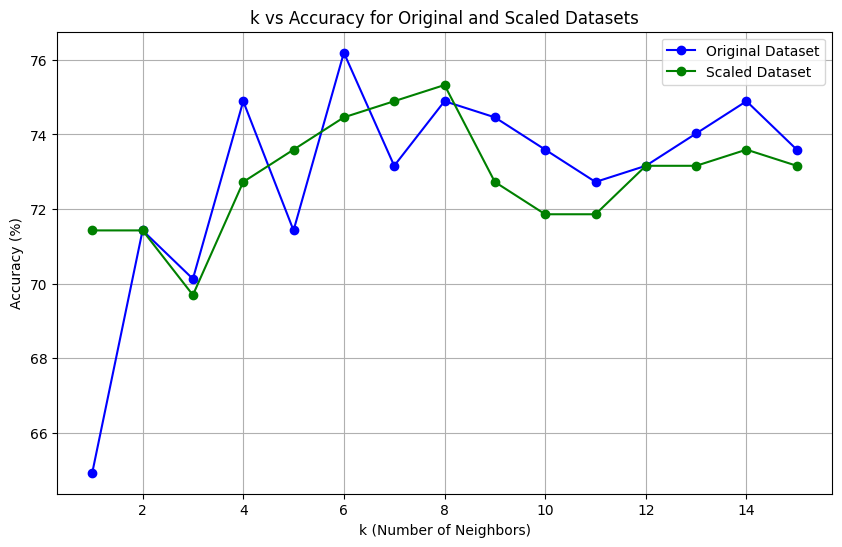

In [34]:
import matplotlib.pyplot as plt

# Extract accuracy values for both original and scaled results

k_values = [k for k, acc, _ in results_original]
accuracy_original = [acc for _, acc, _ in results_original]
accuracy_scaled = [acc for _, acc, _ in results_scaled]

# Create a plot for accuracy vs k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_original, label='Original Dataset', color='blue', marker='o')
plt.plot(k_values, accuracy_scaled, label='Scaled Dataset', color='green', marker='o')
plt.title('k vs Accuracy for Original and Scaled Datasets')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()


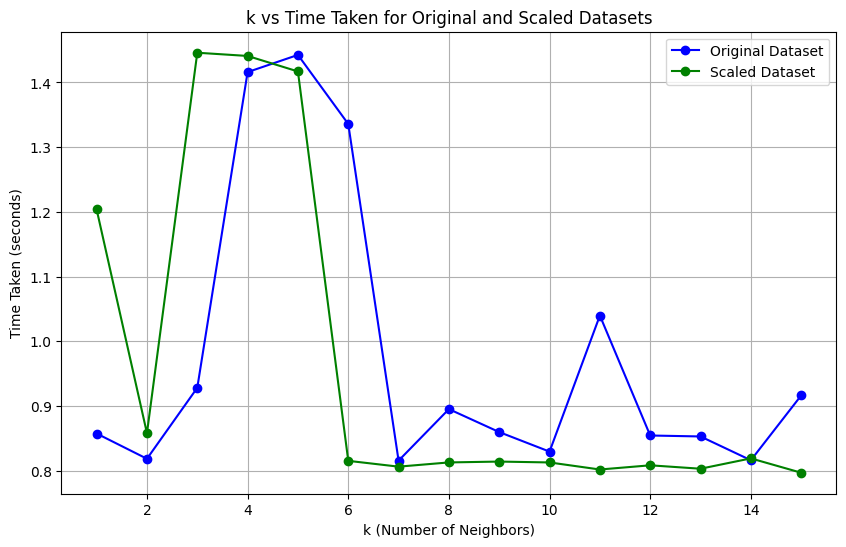

In [35]:
# Extract time values for both original and scaled results
time_original = [time_taken for _, _, time_taken in results_original]
time_scaled = [time_taken for _, _, time_taken in results_scaled]

# Create a plot for time vs k
plt.figure(figsize=(10, 6))
plt.plot(k_values, time_original, label='Original Dataset', color='blue', marker='o')
plt.plot(k_values, time_scaled, label='Scaled Dataset', color='green', marker='o')
plt.title('k vs Time Taken for Original and Scaled Datasets')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Time Taken (seconds)')
plt.legend()
plt.grid(True)
plt.show()


3. Analyze and Discuss:

• Discuss how the choice of k affects the accuracy and computational cost.

• Identify the optimal k based on your analysis.

In [36]:
# Finding the optimal k based on accuracy
best_k_accuracy = k_values[np.argmax(accuracy_scaled)]
best_accuracy = max(accuracy_scaled)

# Finding the optimal k based on time taken
best_k_time = k_values[np.argmin(time_scaled)]
best_time = min(time_scaled)

print(f"Optimal k based on accuracy: {best_k_accuracy} with accuracy = {best_accuracy:.2f}%")
print(f"Optimal k based on time taken: {best_k_time} with time = {best_time:.4f} seconds")


Optimal k based on accuracy: 8 with accuracy = 75.32%
Optimal k based on time taken: 15 with time = 0.7969 seconds


In [37]:
#The choice of k impacts both accuracy and computational cost:
#Small k Captures local patterns but may overfit (sensitive to noise). Lower computational cost.
#Large k Smoothens predictions and reduces noise sensitivity but may underfit. Higher computational cost.
#Optimal k balances accuracy and efficiency, often determined using techniques like cross-validation or the Elbow Method.